In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem


Generate a dataframe of SMC dft dataset

In [65]:
#Preparing to match dft data to ligands we use in smc
#Turing smiles from smc to inchi
df = pd.read_excel('P_selected.xlsx', engine = 'openpyxl', sheet_name='Commercials')
#smc_inchi = smc_df['Smiles'].map(Chem.MolFromSmiles).map(Chem.MolToInchi)

Clean up the data
 - clear up non values
 - dropping zero-variance features and similar features

In [66]:
#Arbitrarily assign 0 value to all NaN spaces
df.replace(np.nan, 0)
#Dropping some of the incomplete/useless parts of dataset
df_origin = df
try:
    df = df.drop(columns = ['SMILES','y1','y2','y3','y4','buch'])
    df = df.drop(columns = ['y6','y10','y11','y12','y13','y14','y17'])
    df = df.drop(columns = ['y15','y16','y18','y19','y5','y7','y8','y9'])
    df = df.drop(columns = ['y1','y2','y11','y12','y13','y14','y16','SMILES'])
except:
    pass
df.to_excel("output.xlsx")  


In [67]:
df=df.drop(columns = ['SMILES','SMC_dataset','pred_451182','pred_281777','pred_851182','pred_7934148','pred_451182_2'])

In [68]:
df

,Unnamed: 0,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193
0,269,275,-0.049778,1.840157,-0.223190,-0.028370,-0.125780,0.194820,0.040603,0.060200,...,0.000000,6.045284,6.991718,6.991718,6.991718,0.000000,6.991718,1,4,68.943806
1,356,368,-0.060689,1.810071,-0.213519,-0.016677,-0.115098,0.196842,0.033654,0.065350,...,1.666878,6.456207,7.311910,6.959667,8.329895,1.370228,8.255192,34,42,4701.434167
2,436,452,-0.022541,1.981699,-0.238576,-0.025716,-0.132146,0.212860,0.041021,0.084116,...,0.074994,5.044904,6.924897,5.485809,7.055466,1.569657,7.055466,5,9,13.236889
3,386,398,-0.053656,1.846617,-0.228732,-0.018851,-0.123791,0.209881,0.036524,0.092472,...,0.024508,6.082032,6.780762,6.756537,6.823829,0.067292,6.756537,2,7,29.756111
4,376,388,-0.031466,1.911469,-0.245471,-0.015675,-0.130573,0.229796,0.037107,0.090482,...,1.855932,5.827070,7.097216,5.069452,8.204676,3.135224,7.373492,63,65,999.120806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1,11,-0.066835,1.796642,-0.220135,0.032067,-0.094034,0.252203,0.017531,0.104344,...,0.373950,6.356046,7.242140,6.166027,7.428162,1.262135,7.055396,25,25,605.912194
220,2,14,-0.064759,1.782111,-0.223490,0.033340,-0.095075,0.256830,0.017598,0.116220,...,0.000000,4.888196,6.667142,6.667142,6.667142,0.000000,6.667142,1,1,5.042583
221,39,252,-0.056110,1.784801,-0.228666,0.032498,-0.098084,0.261164,0.018421,0.113030,...,0.794245,6.154538,6.146342,5.652516,7.728603,2.076087,7.639953,25,30,273.510250
222,35,239,-0.060831,1.791870,-0.228205,0.035618,-0.096294,0.263823,0.017589,0.094855,...,2.455500,5.625856,5.939702,5.710000,7.378234,1.668234,7.314714,58,58,2047.855333


In [69]:
# drop highly correlated features
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(to_drop, axis=1)
print (f"Dropping {len(to_drop)} features {to_drop}")

Dropping 58 features ['ID', 'x7', 'x16', 'x17', 'x22', 'x27', 'x29', 'x35', 'x40', 'x41', 'x48', 'x49', 'x61', 'x62', 'x63', 'x71', 'x72', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x89', 'x90', 'x94', 'x96', 'x99', 'x100', 'x107', 'x108', 'x110', 'x111', 'x113', 'x114', 'x118', 'x119', 'x124', 'x127', 'x130', 'x134', 'x135', 'x136', 'x137', 'x138', 'x140', 'x142', 'x145', 'x148', 'x149', 'x151', 'x152', 'x153', 'x155', 'x158', 'x159', 'x162', 'x177']


c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


UMAP Dimension Reduction to 2

In [70]:
from sklearn.decomposition import PCA
from umap import UMAP
# define the dimensionalities of the reduced representation to study
dims = [80, 50, 20, 10, 5, 2]
# dictionary to store data at different levels of dimensionality reduction
dfs={}
# UMAP section
n_neighbors = np.int(np.sqrt(df.shape[1]))
for dim in dims:
    key = f"umap{dim}"
    dfs[key] = pd.DataFrame(UMAP(n_components=dim, n_neighbors=n_neighbors).fit_transform(df), index=df.index)
# PCA section
pc = pd.DataFrame(PCA(n_components=None).fit_transform(df), index=df.index)
for dim in dims:
    key = f"pc{dim}"
    dfs[key] = pc.iloc[:, :dim]

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


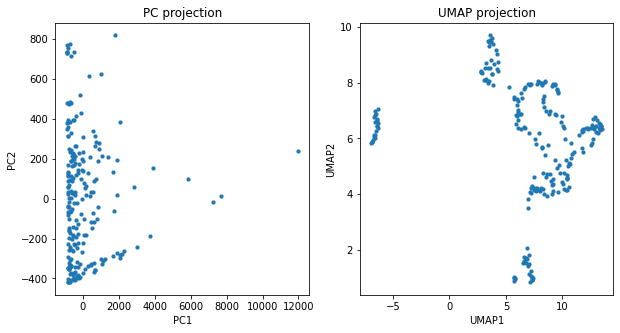

In [71]:
# Visualize the embeddings
f, ax = plt.subplots(1, 2, figsize=(10, 5)) #, dpi=200)
dfs['pc2'].columns = ['PC1', 'PC2']
dfs['umap2'].columns = ['UMAP1', 'UMAP2']
_= sns.scatterplot(x='PC1', y='PC2', data=dfs['pc2'], s=15, alpha=1, linewidth=0.25,  edgecolor='face', ax=ax[0]).set_title("PC projection")
_=sns.scatterplot(x='UMAP1', y='UMAP2', data=dfs['umap2'], s=15, alpha=1, linewidth=0.25, edgecolor='face', ax=ax[1]).set_title("UMAP projection")

Clustering

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata
from sklearn.metrics import silhouette_score
# Define the numbeor of clusters to study
N_CLS_list = list(range(5, 41))
def silhouette_scores_hierarchical(data, n_cls_list):
 """helper function to compute a silhouette score for hierarchical cluster
ing using Ward linkage"""
 
 z = linkage(data, method='ward')
 
 result = pd.Series(index=n_cls_list, dtype=float)
 for n_cls in n_cls_list:
    cls = fcluster(z, n_cls, criterion='maxclust')
    result.loc[n_cls] = silhouette_score(data, cls)
 return result


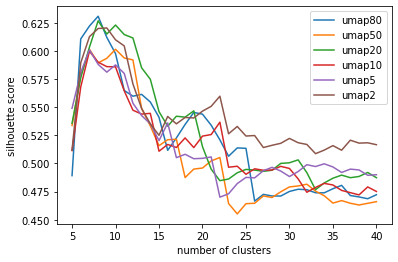

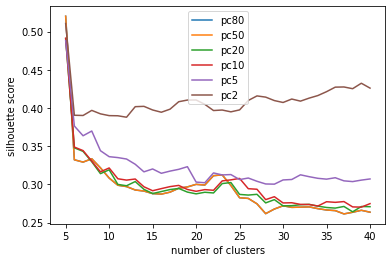

In [73]:
# populate silhouette scores for all number of clusters and all dimensionality reductions that are pre-calculated
silh_scores = pd.DataFrame(index=N_CLS_list)
for key, value in dfs.items():
    silh_scores[key] = silhouette_scores_hierarchical(value, N_CLS_list)
# plot the silhouette scores
_=silh_scores.groupby(silh_scores.columns.str.startswith('pc'), axis=1).plot(
xlabel='number of clusters',ylabel='silhouette score')


Final Clustering

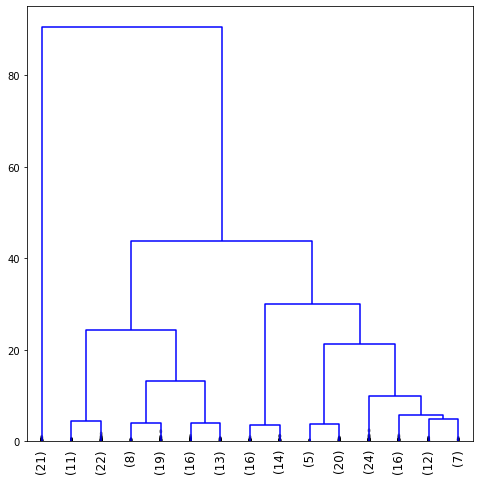

In [74]:
# final number of clusters to produce
NCLS = 15
# linkage and clustering for selected featurization
z = linkage(dfs['umap10'], method="ward")
cls = fcluster(z, NCLS, criterion='maxclust')
# plot the dendrogram
plt.figure(figsize=(8, 8))
_=dendrogram(z, truncate_mode='lastp', p=NCLS, show_contracted=True, leaf_rotation=90, color_threshold=0)


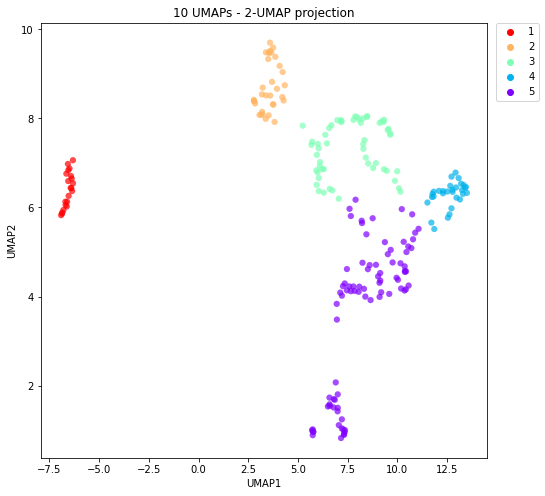

In [75]:
# plot clustering
NCLS = 5
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
 palette='rainbow_r', legend='full', hue=cls).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


In [76]:
df['SMC_dataset']=df_origin['SMC_dataset']

It makes sense - in cluster 2 there's full of phosphites. I won't expect them to be in the set of 'working ligands'. 

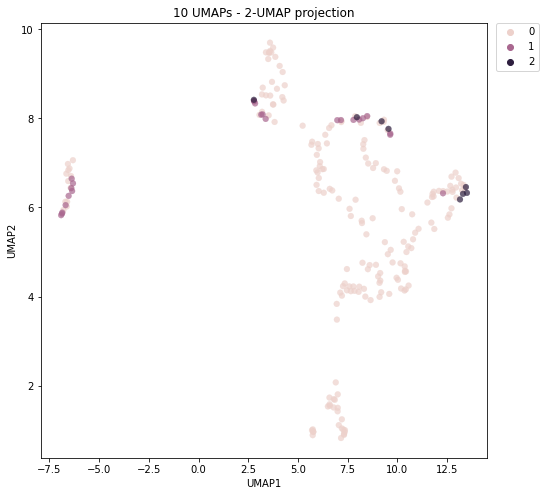

In [77]:
# plot clustering
NCLS = 5
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
  legend='full', hue=df['SMC_dataset']).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

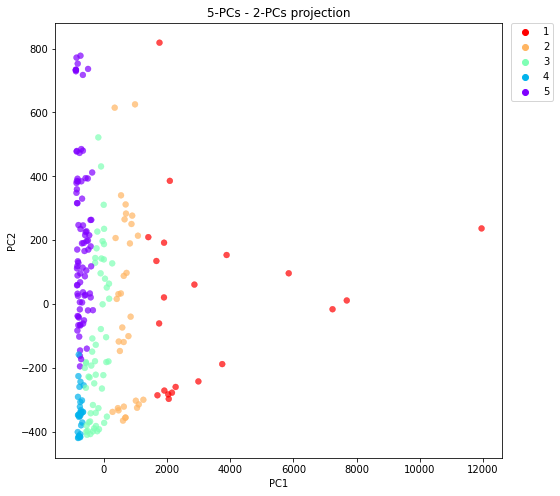

In [78]:
# plot clustering
NCLS = 5
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PC1", y="PC2", data=dfs['pc2'], s=35, alpha=0.7, linewidth=0.4, edgecolor='face',
 palette='rainbow_r', legend='full', hue=cls).set_title("5-PCs - 2-PCs projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

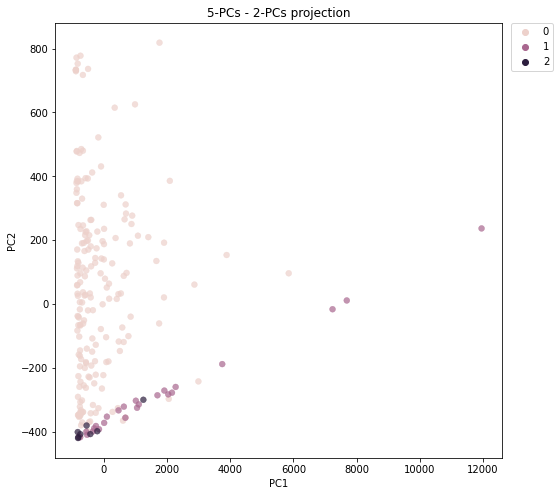

In [79]:
# plot clustering
NCLS = 5
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PC1", y="PC2", data=dfs['pc2'], s=35, alpha=0.7, linewidth=0.4, edgecolor='face',
 legend='full', hue=df['SMC_dataset']).set_title("5-PCs - 2-PCs projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [80]:
def generate_ligand_data(df):
    #Convert the smiles of ligand to a dataframe.
    df = df.copy()
    rxns = []
    smiles = df_origin['SMILES']
    for i in smiles:
        try:
            ligand_smiles = Chem.MolFromSmiles(i)
            rxns.append(ligand_smiles)
        except:
            print(i)
        
    return rxns

Cluster 1, n molecules: 21


[11:47:40] Explicit valence for atom # 7 B, 6, is greater than permitted


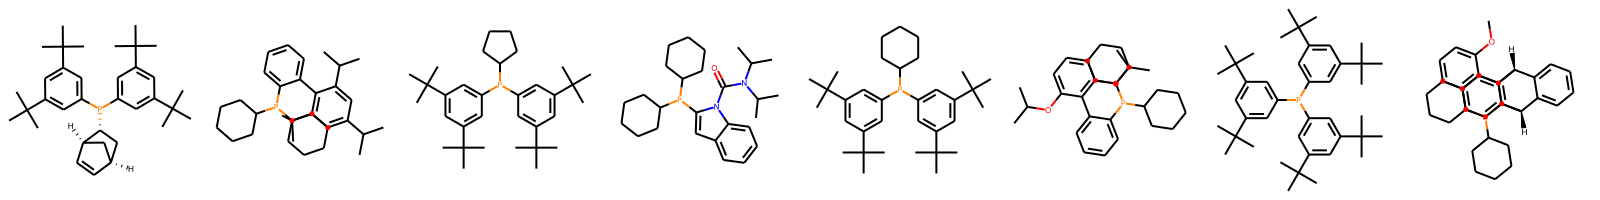

Cluster 2, n molecules: 33


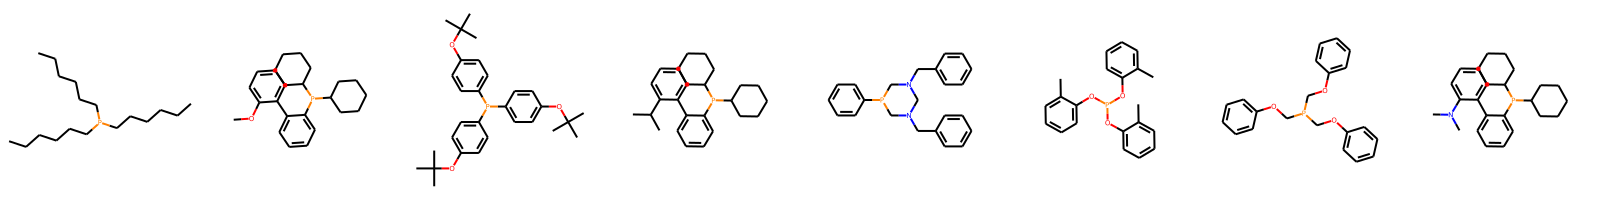

Cluster 3, n molecules: 56


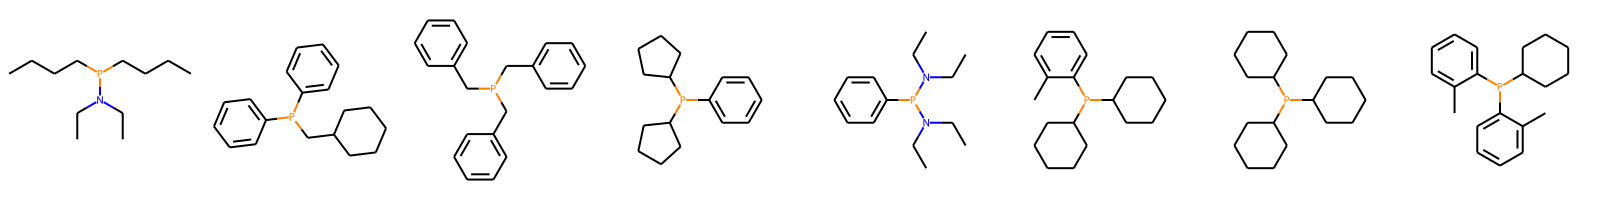

Cluster 4, n molecules: 30


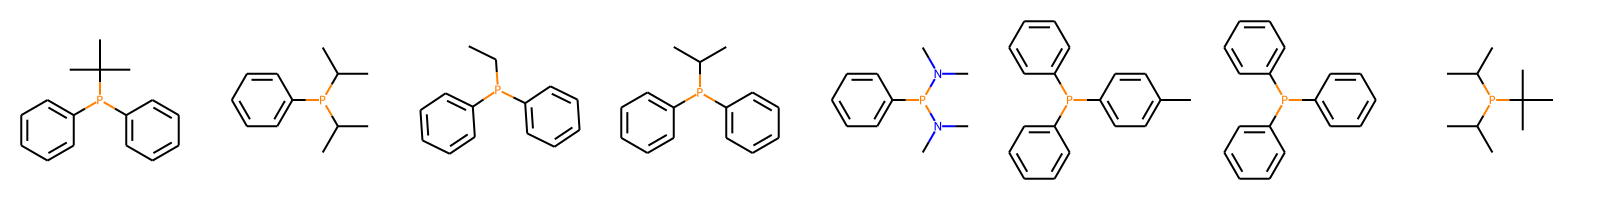

Cluster 5, n molecules: 84


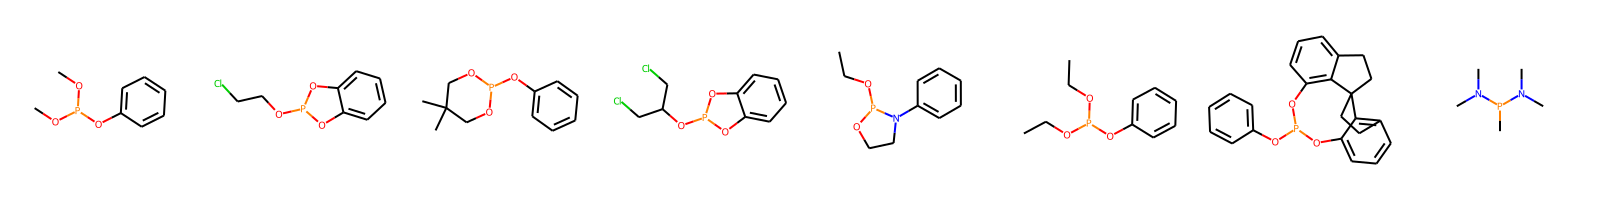

In [81]:
from scipy.spatial.distance import cdist
from rdkit.Chem import Draw
# build rdkit molecules for all candidates
df = df
df['mol'] = generate_ligand_data(df)
mols = pd.Series(((df['mol'])), index=df.index).to_frame('mol')
features='umap2'
# How many central molecules to display?
n_per_cluster = 8
# store central candidates for 
cands=[]
for group, data in mols.groupby(cls):
 # get descriptor data for this cluster
 desc_data=dfs[features].loc[data.index]
 
 # compute distances of these molecules to their center
 dists=pd.Series(cdist([desc_data.mean()], desc_data)[0],
 index=desc_data.index)
 # select top n central molecules
 selected=dists.sort_values().head(n_per_cluster).index
 
 smi=mols.loc[selected]['mol'].map(Chem.MolToSmiles)
 smi=smi.reset_index(drop=True).to_frame(f"Cluster{group}")
 cands.append(smi)
 
 print (f"Cluster {group}, n molecules: {len(data)}")
 ms = data['mol'].loc[selected]
 display(Draw.MolsToGridImage(ms, molsPerRow=n_per_cluster))
 
cands = pd.concat(cands, axis=1)

In [82]:
cands

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
0,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)[C...,CCCCCCP(CCCCCC)CCCCCC,CCCCP(CCCC)N(CC)CC,CC(C)(C)P(c1ccccc1)c1ccccc1,COP(OC)Oc1ccccc1
1,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,COc1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,c1ccc(P(CC2CCCCC2)c2ccccc2)cc1,CC(C)P(c1ccccc1)C(C)C,ClCCOP1Oc2ccccc2O1
2,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)C2...,CC(C)(C)Oc1ccc(P(c2ccc(OC(C)(C)C)cc2)c2ccc(OC(...,c1ccc(CP(Cc2ccccc2)Cc2ccccc2)cc1,CCP(c1ccccc1)c1ccccc1,CC1(C)COP(Oc2ccccc2)OC1
3,CC(C)N(C(=O)n1c(P(C2CCCCC2)C2CCCCC2)cc2ccccc21...,CC(C)c1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,c1ccc(P(C2CCCC2)C2CCCC2)cc1,CC(C)P(c1ccccc1)c1ccccc1,ClCC(CCl)OP1Oc2ccccc2O1
4,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)C2...,c1ccc(CN2CN(Cc3ccccc3)CP(c3ccccc3)C2)cc1,CCN(CC)P(c1ccccc1)N(CC)CC,CN(C)P(c1ccccc1)N(C)C,CCOP1OCCN1c1ccccc1
5,CC(C)Oc1cccc(OC(C)C)c1-c1ccccc1P(C1CCCCC1)C1CC...,Cc1ccccc1OP(Oc1ccccc1C)Oc1ccccc1C,Cc1ccccc1P(C1CCCCC1)C1CCCCC1,Cc1ccc(P(c2ccccc2)c2ccccc2)cc1,CCOP(OCC)Oc1ccccc1
6,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)c2...,c1ccc(OCP(COc2ccccc2)COc2ccccc2)cc1,C1CCC(P(C2CCCCC2)C2CCCCC2)CC1,c1ccc(P(c2ccccc2)c2ccccc2)cc1,c1ccc(OP2Oc3cccc4c3C3(CC4)CCc4cccc(c43)O2)cc1
7,COc1ccccc1C1=C(P(C2CCCCC2)C2CCCCC2)[C@H]2c3ccc...,CN(C)c1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,Cc1ccccc1P(c1ccccc1C)C1CCCCC1,CC(C)P(C(C)C)C(C)(C)C,CN(C)P(C)N(C)C


# Plotting 3d diagram of the ligand awaited screening

In [83]:
def plot_three_features(df_x,i,j,k):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],c=df['SMC_dataset'])
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    plt.show()

A plot of axis: x4 x51 , and  x182


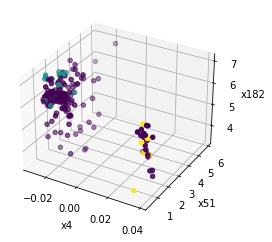

In [84]:
plot_three_features(df,'x4','x51','x182')

In [93]:
# Plot a diagram from angle a, b with yields. Remember to use df_origin and df_origin['x198'-'x202'] as input. 
# You can use df_x and df_y, but check and compare the index before use.
def plot_three_features_anydir(df_x,i,j,k,df_y,a,b):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],c=df_y)
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    # rotate the axes by angles you want
    ax.view_init(a,b)
        
    plt.show()

A plot of axis: x4 x51 , and  x182


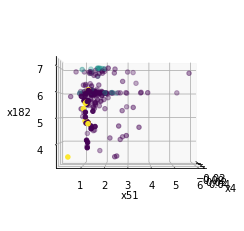

A plot of axis: x4 x51 , and  x182


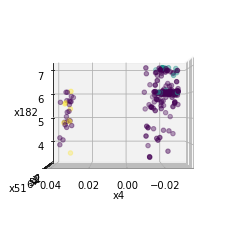

A plot of axis: x4 x51 , and  x182


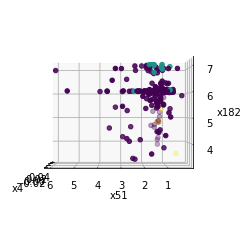

A plot of axis: x4 x51 , and  x182


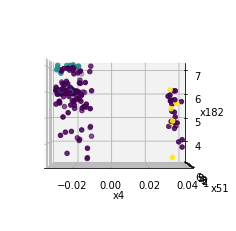

In [100]:
# Plot 'fraction=12' number of diagrams from different angles, rotating 360/fraction degrees at a time.
blist=[]
a=0
fraction = 4
for i in range(0,fraction):
    blist.append(i*(360/fraction))
for i in blist:
    plot_three_features_anydir(df,'x4','x51','x182',df['SMC_dataset'],a,i)